# Credit Card Fraud Detection

In [4]:
import pandas as pd
df = pd.read_csv(r"C:\Users\thaku\Downloads\Fraud_data\fraudTrain.csv")

In [5]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


## Exploratory Data Analysis


In [6]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [56]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

### 1. Transaction amount vs Fraud
With the dataset cleaned, we can now start to examine how various features relate to fraud. First we will see how the distrition of transaction amount differs between fraudulent and normal activities. As there are extreme outliers in transaction amount, and the 99 percentile is around $546, we subset the data for any transaction amounts below \$1,000 to make the visualizations more readable.

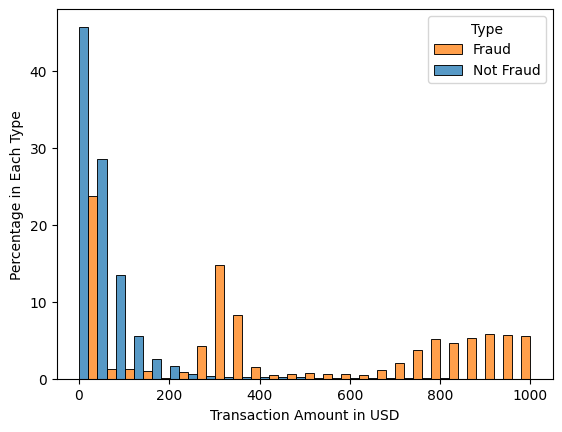

In [8]:
#amount vs fraud
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.histplot(x='amt',data=df[df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

The result is very interesting! While normal transactions tend to be around $200 or less, we see fraudulent transactions peak around \$300 and then at the $800-\$1000 range. There is a very clear pattern here!

### 2. Gender vs Fraud
Second, we will examine whether one gender is more susceptible to fraud than the other.

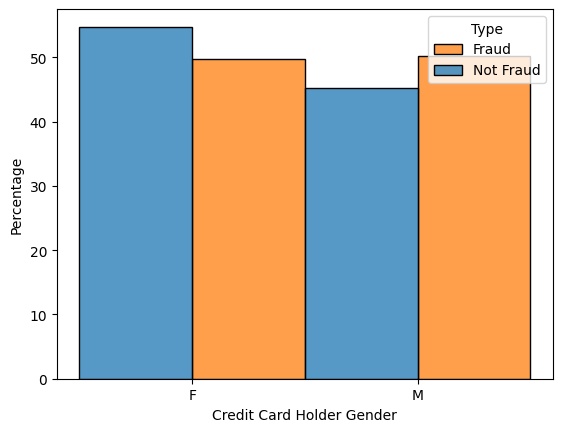

In [10]:
#Gender vs Fraud
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In this case, we do not see a clear difference between both genders. Data seem to suggest that females and males are almost equally susceptible (50%) to transaction fraud. Gender is not very indicative of a fraudulent transaction.

 ### 3. Spending Category vs Fraud
 Third, we examine in which spending categories fraud happens most predominantly. To do this, we first calculate the distribution in normal transactions and then the the distribution in fraudulent activities. The difference between the 2 distributions will demonstrate which category is most susceptible to fraud

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

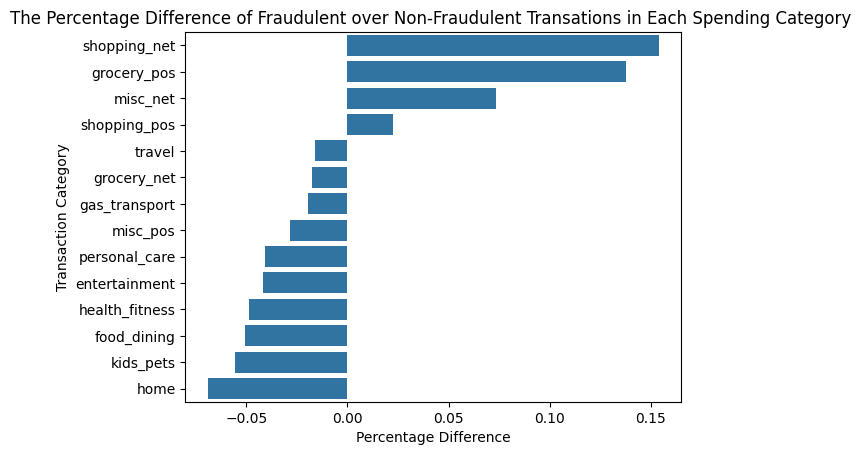

In [11]:
a=df[df['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=df[df['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

Some spending categories indeed see more fraud than others! Fraud tends to happen more often in 'Shopping_net', 'Grocery_pos', and 'misc_net' while 'home' and 'kids_pets' among others tend to see more normal transactions than fraudulent ones.

### 4. Age vs Fraud
Are older people more prone to credit card fraud? Or is it the other way around? Given the birthday info, we can calculate the age of each card owner (in 2022) and see whether a trend exists.

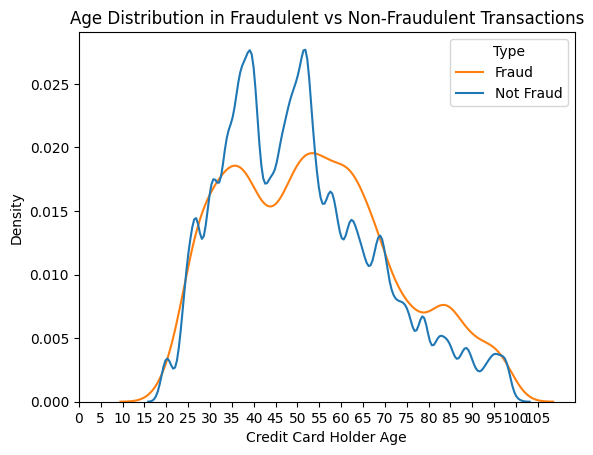

In [13]:
#age vs fraud
import datetime as dt
import numpy as np
df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year
ax=sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

The age distribution is visibly different between 2 transaction types. In normal transactions, there are 2 peaks at the age of 37-38 and 49-50, while in fraudulent transactions, the age distribution is a little smoother and the second peak does include a wider age group from 50-65. This does suggest that older people are potentially more prone to fraud.

### Data Pre-Processing
Converting colums into datetime and Adding new Column age

In [14]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

# Split into date and time
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_hours'] = df['trans_date_trans_time'].dt.hour + df['trans_date_trans_time'].dt.minute / 60 


# Calculate age at the time of transaction
def calculate_age(dob, transaction_date):
    age = transaction_date.year - dob.year - ((transaction_date.month, transaction_date.day) < (dob.month, dob.day))
    return age

df['age'] = df.apply(lambda row: calculate_age(row['dob'], row['trans_date']), axis=1)


In [15]:
df['amt'].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [16]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,trans_date,trans_hours
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,30,2019-01-01,0.000000
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,40,2019-01-01,0.000000
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,56,2019-01-01,0.000000
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,51,2019-01-01,0.016667
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,32,2019-01-01,0.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,58,2020-06-21,12.200000
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,40,2020-06-21,12.200000
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,52,2020-06-21,12.200000
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,39,2020-06-21,12.216667


In [17]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'age', 'trans_date',
       'trans_hours'],
      dtype='object')

In [18]:
df.dtypes

Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
age                               int64
trans_date                       object


Adding new Column Distance using Haversine formula

In [61]:
import numpy as np

# Function to calculate the distance between two points using the Haversine formula
def haversine(lat1, long1, lat2, long2):
    # Convert latitude and longitude from degrees to radians
    lat1, long1, lat2, long2 = map(np.radians, [lat1, long1, lat2, long2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlong = long2 - long1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radius of Earth in kilometers (mean value)
    r = 6371
    return c * r

# Applying the function to create a new 'distance' feature
df['distance'] = df.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_hours,age,distance
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,0.000000,30,78.597568
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,0.000000,40,30.212176
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,0.000000,56,108.206083
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,0.016667,51,95.673231
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,0.050000,32,77.556744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,2020-06-21,12.200000,58,119.752136
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,2020-06-21,12.200000,40,75.104085
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,2020-06-21,12.200000,52,99.047734
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,2020-06-21,12.216667,39,84.627652


In [62]:
df['category'].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [63]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'trans_date', 'trans_hours',
       'age', 'distance'],
      dtype='object')

In [64]:
df = df.drop(['Unnamed: 0' ,'job', 'first' , 'last' , 'street' , 'lat' , 'long' , 'dob' , 'trans_num' , 'unix_time' ,'city' , 'merch_lat' , 'merch_long' , 'trans_date_trans_time' , 'trans_date' ], axis=1)

In [66]:
df.dtypes

cc_num           int64
merchant        object
category        object
amt            float64
gender          object
state           object
zip              int64
city_pop         int64
is_fraud         int64
trans_hours    float64
age              int64
distance       float64
dtype: object

In [67]:
df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'state', 'zip',
       'city_pop', 'is_fraud', 'trans_hours', 'age', 'distance'],
      dtype='object')

In [68]:
df.nunique()

cc_num             983
merchant           693
category            14
amt              52928
gender               2
state               51
zip                970
city_pop           879
is_fraud             2
trans_hours       1440
age                 83
distance       1296675
dtype: int64

In [70]:
df.isna().sum()

cc_num         0
merchant       0
category       0
amt            0
gender         0
state          0
zip            0
city_pop       0
is_fraud       0
trans_hours    0
age            0
distance       0
dtype: int64

In [71]:
df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'state', 'zip',
       'city_pop', 'is_fraud', 'trans_hours', 'age', 'distance'],
      dtype='object')

In [74]:
df2 = df.copy()

In [75]:
df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'state', 'zip',
       'city_pop', 'is_fraud', 'trans_hours', 'age', 'distance'],
      dtype='object')

In [76]:
df.nunique()

cc_num             983
merchant           693
category            14
amt              52928
gender               2
state               51
zip                970
city_pop           879
is_fraud             2
trans_hours       1440
age                 83
distance       1296675
dtype: int64

The code converts categorical text data into numerical format using LabelEncoder, creates reverse mappings to decode the numerical values back to their original categories, and stores these mappings for later reference. 

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame
# Initialize a dictionary to store label encoders for later inverse encoding
label_encoders = {}

# Loop through each column in the DataFrame
for column in df.columns:
    if df[column].dtype == 'object'  :
        # Convert all values to strings to ensure uniformity
        df[column] = df[column].astype(str)
        # Initialize a LabelEncoder
        le = LabelEncoder()
        # Fit and transform the column values
        df[column] = le.fit_transform(df[column])
        # Store the label encoder for later inverse transformation
        label_encoders[column] = le

encoding_mappings = {}

for column, le in label_encoders.items():
    # Get the mapping of the original values to encoded values
    mapping = {index: label for index, label in enumerate(le.classes_)}
    encoding_mappings[column] = mapping

# Display the mappings
for column, mapping in encoding_mappings.items():
    print(f"Mapping for column '{column}':")
    print(mapping)
    print("\n")

Mapping for column 'merchant':
{0: 'fraud_Abbott-Rogahn', 1: 'fraud_Abbott-Steuber', 2: 'fraud_Abernathy and Sons', 3: 'fraud_Abshire PLC', 4: 'fraud_Adams, Kovacek and Kuhlman', 5: 'fraud_Adams-Barrows', 6: 'fraud_Altenwerth, Cartwright and Koss', 7: 'fraud_Altenwerth-Kilback', 8: 'fraud_Ankunding LLC', 9: 'fraud_Ankunding-Carroll', 10: 'fraud_Armstrong, Walter and Gottlieb', 11: 'fraud_Auer LLC', 12: 'fraud_Auer-Mosciski', 13: 'fraud_Auer-West', 14: 'fraud_Bahringer Group', 15: 'fraud_Bahringer, Bergnaum and Quitzon', 16: 'fraud_Bahringer, Osinski and Block', 17: 'fraud_Bahringer, Schoen and Corkery', 18: 'fraud_Bahringer-Larson', 19: 'fraud_Bahringer-Streich', 20: 'fraud_Bailey-Morar', 21: 'fraud_Balistreri-Nader', 22: 'fraud_Barrows PLC', 23: 'fraud_Bartoletti and Sons', 24: 'fraud_Bartoletti-Wunsch', 25: 'fraud_Barton Inc', 26: 'fraud_Barton LLC', 27: 'fraud_Bashirian Group', 28: 'fraud_Bauch-Blanda', 29: 'fraud_Bauch-Raynor', 30: 'fraud_Baumbach Ltd', 31: 'fraud_Baumbach, Feeney 

In [78]:
import json

In [79]:
file_path = 'encoding_mappings.json'
with open(file_path, 'w') as f:
    json.dump(encoding_mappings, f, indent=4)

In [80]:
df.nunique()

cc_num             983
merchant           693
category            14
amt              52928
gender               2
state               51
zip                970
city_pop           879
is_fraud             2
trans_hours       1440
age                 83
distance       1296675
dtype: int64

In [81]:
df.dtypes

cc_num           int64
merchant         int64
category         int64
amt            float64
gender           int64
state            int64
zip              int64
city_pop         int64
is_fraud         int64
trans_hours    float64
age              int64
distance       float64
dtype: object

## Model Building


#### SMOTE
As in dataset class distribution is highly imbalanced , There we will use oversampling technique 
It generates synthetic samples for the minority class to balance the class distribution.

##### Models Used :

XGBoost


RandomForest


GradientBoosting


AdaBoost


LogisticRegression






TRAINING
TRAINING
TRAINING
TRAINING


c:\Users\thaku\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


TRAINING
Feature Importances:

XGBoost Feature Importances:
amt            0.572839
category       0.148400
trans_hours    0.071150
gender         0.044933
age            0.032927
merchant       0.026624
cc_num         0.022291
city_pop       0.022187
distance       0.021802
zip            0.020512
state          0.016337
dtype: float32

RandomForest Feature Importances:
amt            0.585646
category       0.114206
trans_hours    0.095683
age            0.041399
merchant       0.035542
city_pop       0.031078
distance       0.025337
cc_num         0.024067
zip            0.022749
state          0.015843
gender         0.008450
dtype: float64

GradientBoosting Feature Importances:
amt            0.862381
category       0.100270
trans_hours    0.025117
merchant       0.006292
distance       0.003404
gender         0.001075
cc_num         0.000539
age            0.000392
city_pop       0.000370
zip            0.000144
state          0.000016
dtype: float64

AdaBoost Feature Importances

C:\Users\thaku\AppData\Local\Temp\ipykernel_10996\354862247.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage.index.astype(str), y=percentage.values, palette='viridis', ax=ax)
C:\Users\thaku\AppData\Local\Temp\ipykernel_10996\354862247.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage.index.astype(str), y=percentage.values, palette='viridis', ax=ax)
C:\Users\thaku\AppData\Local\Temp\ipykernel_10996\354862247.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage.index.astype(str), y=percentage.value

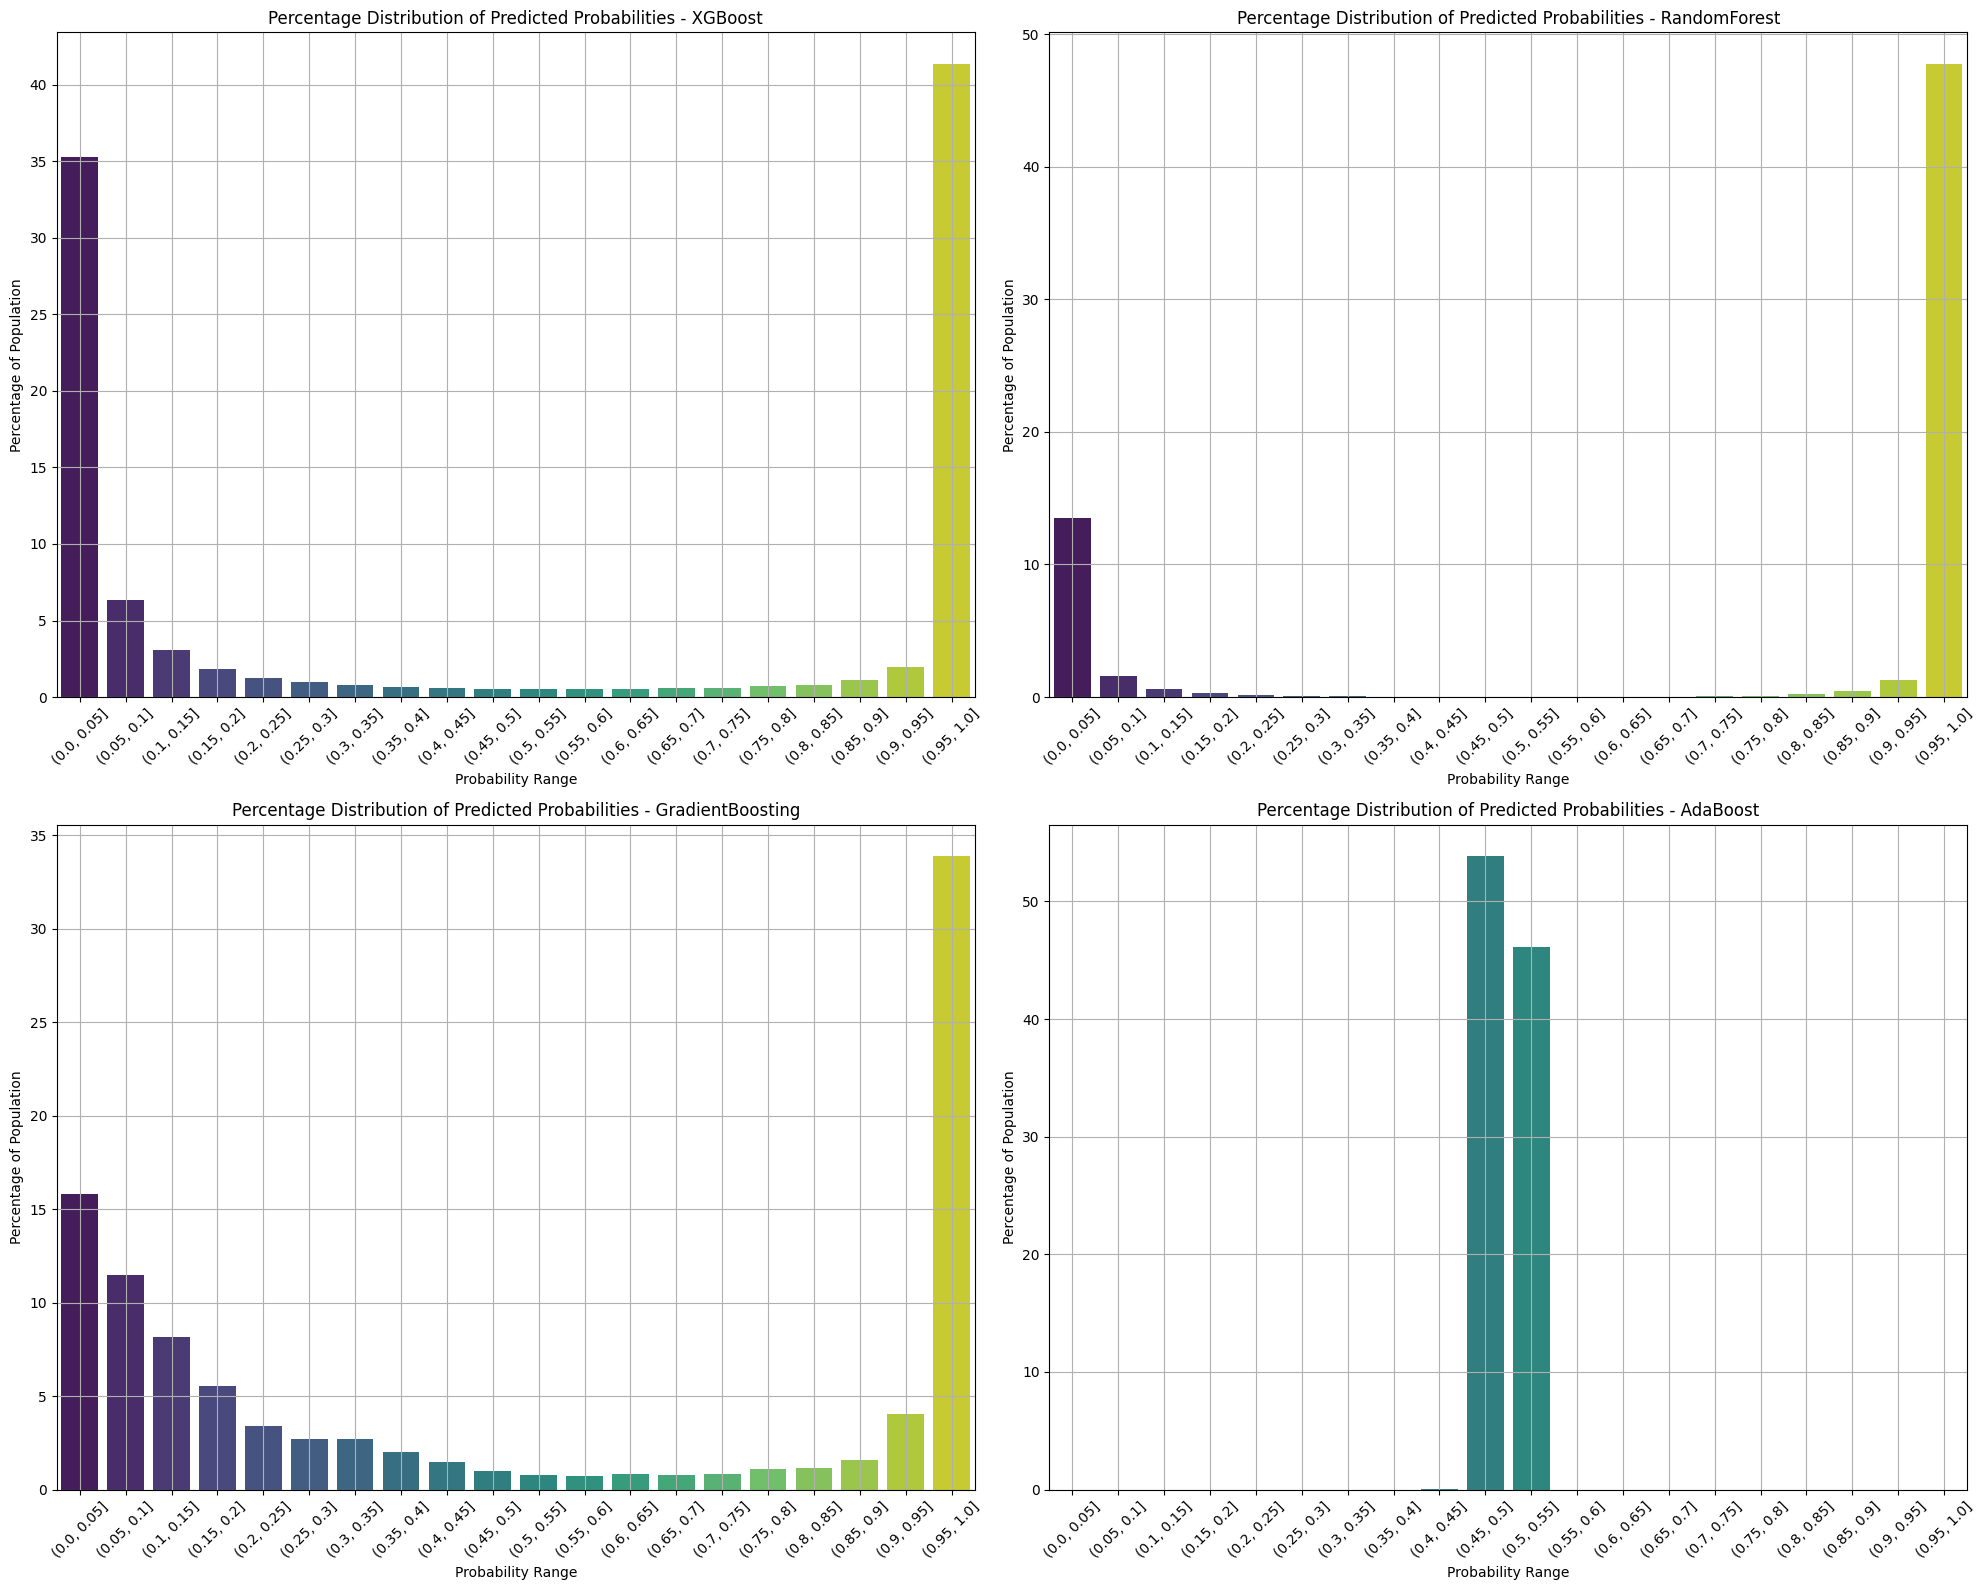


AUC Scores:
XGBoost: 1.00
RandomForest: 1.00
GradientBoosting: 0.97
AdaBoost: 0.96
LogisticRegression: 0.50


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE


# Load the data
# Assuming 'df' is your DataFrame and 'target' is the target column
X = df.drop(columns=['is_fraud' ])
y = df['is_fraud']

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Split the balanced data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Define models
models = {
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss'),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'LogisticRegression': LogisticRegression()
}

# Create a dictionary to hold the DataFrame for each model's probabilities
probability_dfs = {}
feature_importances = {}

# Train models, predict probabilities, and extract feature importances
for name, model in models.items():
    print("TRAINING",name)
    model.fit(X_train, y_train)
    probabilities = model.predict_proba(X_smote)[:, 1]
    
    # Save probabilities to a DataFrame
    probability_dfs[name] = pd.DataFrame({'probability': probabilities})
    
    # Get feature importance
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])
    else:
        importances = np.zeros(X.shape[1])  # Fallback in case a model doesn't support feature importances
    
    feature_importances[name] = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Print feature importances for each model
print("Feature Importances:")
for name, importances in feature_importances.items():
    print(f"\n{name} Feature Importances:")
    print(importances)

# Set up the plot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))
axes = axes.flatten()

# Plot the percentage distribution for each model
for ax, (name, prob_df) in zip(axes, probability_dfs.items()):
    probabilities = prob_df['probability']
    bins = np.linspace(0, 1, 21)  # Define bins from 0 to 1
    probability_bins = pd.cut(probabilities, bins=bins)
    frequency = probability_bins.value_counts().sort_index()
    percentage = (frequency / len(probabilities)) * 100
    
    sns.barplot(x=percentage.index.astype(str), y=percentage.values, palette='viridis', ax=ax)
    ax.set_title(f'Percentage Distribution of Predicted Probabilities - {name}')
    ax.set_xlabel('Probability Range')
    ax.set_ylabel('Percentage of Population')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.savefig('model_probability_distributions.jpeg')
plt.show()

# Calculate and print AUC scores for each model on test data
print("\nAUC Scores:")
for name, model in models.items():
    y_test_prob = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_test_prob)
    print(f"{name}: {auc_score:.2f}")


## Testing Our Model on the Test Data

In [83]:
df2 = pd.read_csv(r"C:\Users\thaku\Downloads\Fraud_data\fraudTest.csv")

### Same preprocessing steps are applied for the test data

In [84]:
df2

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [85]:
train_df = df.copy()

In [86]:
df = df2.copy()

In [87]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

# Split into date and time
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_hours'] = df['trans_date_trans_time'].dt.hour + df['trans_date_trans_time'].dt.minute / 60 


# Calculate age at the time of transaction
def calculate_age(dob, transaction_date):
    age = transaction_date.year - dob.year - ((transaction_date.month, transaction_date.day) < (dob.month, dob.day))
    return age

df['age'] = df.apply(lambda row: calculate_age(row['dob'], row['trans_date']), axis=1)


In [88]:
import numpy as np

# Function to calculate the distance between two points using the Haversine formula
def haversine(lat1, long1, lat2, long2):
    # Convert latitude and longitude from degrees to radians
    lat1, long1, lat2, long2 = map(np.radians, [lat1, long1, lat2, long2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlong = long2 - long1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radius of Earth in kilometers (mean value)
    r = 6371
    return c * r

# Applying the function to create a new 'distance' feature
df['distance'] = df.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_hours,age,distance
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12.233333,52,24.561462
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12.233333,30,104.925092
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12.233333,49,59.080078
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,12.250000,32,27.698567
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12.250000,64,104.335106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,2020-12-31,23.983333,54,77.026148
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,2020-12-31,23.983333,21,100.074420
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,2020-12-31,23.983333,39,80.759302
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,2020-12-31,23.983333,55,52.933240


In [89]:
df = df.drop(['Unnamed: 0' , 'job', 'first' , 'last' , 'street' , 'lat' , 'long' , 'dob' , 'trans_num' , 'unix_time' ,'city' , 'merch_lat' , 'merch_long' , 'trans_date_trans_time' , 'trans_date' ], axis=1)

In [90]:
df.dtypes

cc_num           int64
merchant        object
category        object
amt            float64
gender          object
state           object
zip              int64
city_pop         int64
is_fraud         int64
trans_hours    float64
age              int64
distance       float64
dtype: object

In [91]:
import pandas as pd
import json

# Load encoding mappings from JSON file
file_path = 'encoding_mappings.json'
with open(file_path, 'r') as f:
    encoding_mappings = json.load(f)

# Assume `df` is your DataFrame
# For each column in the encoding mappings, apply the mapping
for column, mapping in encoding_mappings.items():
    if column in df.columns:
        # Use replace() instead of map() to handle missing values more gracefully
        df[column] = df[column].replace(mapping)

# If there are columns that are not in encoding_mappings but are of object type
# you can handle them separately if needed
object_columns = df.select_dtypes(include=['object']).columns
for column in object_columns:
    if column not in encoding_mappings:
        print(f"Warning: No encoding mapping found for column '{column}'")

print("Encoding completed.")


Encoding completed.


In [92]:
df2 = df.copy()

In [93]:
df

,cc_num,merchant,category,amt,gender,state,zip,city_pop,is_fraud,trans_hours,age,distance
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,SC,29209,333497,0,12.233333,52,24.561462
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,UT,84002,302,0,12.233333,30,104.925092
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,NY,11710,34496,0,12.233333,49,59.080078
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,FL,32780,54767,0,12.250000,32,27.698567
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,MI,49632,1126,0,12.250000,64,104.335106
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,MO,63453,519,0,23.983333,54,77.026148
555715,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,TX,77566,28739,0,23.983333,21,100.074420
555716,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,WA,99323,3684,0,23.983333,39,80.759302
555717,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,ID,83643,129,0,23.983333,55,52.933240


In [94]:
import pandas as pd
import json

# Load encoding mappings from JSON file
file_path = 'encoding_mappings.json'
with open(file_path, 'r') as f:
    encoding_mappings = json.load(f)

# Initialize a dictionary to store reversed mappings for each column
reversed_mappings = {}

# Reverse the encoding mappings for each column
for column, mapping in encoding_mappings.items():
    reversed_mappings[column] = {v: k for k, v in mapping.items()}

# Print reversed mappings for verification
print("Reversed Mappings:")
for column, rev_mapping in reversed_mappings.items():
    print(f"{column}: {rev_mapping}")

# Assume `df` is your DataFrame
# Apply the reversed mappings to decode the values in the DataFrame
for column, rev_mapping in reversed_mappings.items():
    if column in df.columns:
        print(f"Decoding column: {column}")
        print("Encoded values:\n", df[column].unique())
        
        # Convert the values to strings to ensure consistency
        df[column] = df[column].astype(str)
        
        # Apply the reversed mapping
        df[column] = df[column].replace(rev_mapping)
        #print("Decoded values:\n", df[column].unique())
    else:
        print(f"Column '{column}' not found in DataFrame.")

print("Decoding completed.")


Reversed Mappings:
merchant: {'fraud_Abbott-Rogahn': '0', 'fraud_Abbott-Steuber': '1', 'fraud_Abernathy and Sons': '2', 'fraud_Abshire PLC': '3', 'fraud_Adams, Kovacek and Kuhlman': '4', 'fraud_Adams-Barrows': '5', 'fraud_Altenwerth, Cartwright and Koss': '6', 'fraud_Altenwerth-Kilback': '7', 'fraud_Ankunding LLC': '8', 'fraud_Ankunding-Carroll': '9', 'fraud_Armstrong, Walter and Gottlieb': '10', 'fraud_Auer LLC': '11', 'fraud_Auer-Mosciski': '12', 'fraud_Auer-West': '13', 'fraud_Bahringer Group': '14', 'fraud_Bahringer, Bergnaum and Quitzon': '15', 'fraud_Bahringer, Osinski and Block': '16', 'fraud_Bahringer, Schoen and Corkery': '17', 'fraud_Bahringer-Larson': '18', 'fraud_Bahringer-Streich': '19', 'fraud_Bailey-Morar': '20', 'fraud_Balistreri-Nader': '21', 'fraud_Barrows PLC': '22', 'fraud_Bartoletti and Sons': '23', 'fraud_Bartoletti-Wunsch': '24', 'fraud_Barton Inc': '25', 'fraud_Barton LLC': '26', 'fraud_Bashirian Group': '27', 'fraud_Bauch-Blanda': '28', 'fraud_Bauch-Raynor': '2

In [95]:
df

,cc_num,merchant,category,amt,gender,state,zip,city_pop,is_fraud,trans_hours,age,distance
0,2291163933867244,319,10,2.86,1,40,29209,333497,0,12.233333,52,24.561462
1,3573030041201292,591,10,29.84,0,44,84002,302,0,12.233333,30,104.925092
2,3598215285024754,611,5,41.28,0,34,11710,34496,0,12.233333,49,59.080078
3,3591919803438423,222,9,60.05,1,9,32780,54767,0,12.250000,32,27.698567
4,3526826139003047,292,13,3.19,1,22,49632,1126,0,12.250000,64,104.335106
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,507,5,43.77,1,24,63453,519,0,23.983333,54,77.026148
555715,3556613125071656,264,7,111.84,1,43,77566,28739,0,23.983333,21,100.074420
555716,6011724471098086,496,7,86.88,0,47,99323,3684,0,23.983333,39,80.759302
555717,4079773899158,75,13,7.99,1,13,83643,129,0,23.983333,55,52.933240


In [96]:
df['merchant'] = df['merchant'].astype(int)

In [97]:
df['category'] = df['category'].astype(int)

In [98]:
df['state'] = df['state'].astype(int)

In [99]:
df['gender'] = df['gender'].astype(int)

In [100]:
df.dtypes

cc_num           int64
merchant         int64
category         int64
amt            float64
gender           int64
state            int64
zip              int64
city_pop         int64
is_fraud         int64
trans_hours    float64
age              int64
distance       float64
dtype: object

## Model Evaluation
Using Confusion matrix ,classification_report , recall_score

In [101]:
from sklearn.metrics import confusion_matrix, classification_report , recall_score
X = df.drop('is_fraud' ,axis=1)
y = df['is_fraud']

print("\nError Analysis for each class (0 and 1):")
for name, model in models.items():
    # Predict class labels
    y_test_pred = model.predict(X)
    
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y, y_test_pred).ravel()

    # Calculate errors
    total = tn + fp + fn + tp
    error_rate = (fp + fn) / total
    class_0_error_rate = fp / (fp + tn)  # False Positive Rate for class 0
    class_1_error_rate = fn / (fn + tp)  # False Negative Rate for class 1

    # Sensitivity (Recall), Specificity, and other metrics
    sensitivity = recall_score(y, y_test_pred)  # Recall for class 1
    specificity = tn / (tn + fp)  # True Negative Rate (class 0)
    fpr = fp / (fp + tn)  # False Positive Rate (class 0)
    
    # Print error analysis
    print(f"\n{name}:")
    print(f"True Positives (TP): {tp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"Error Rate: {error_rate:.2f}")
    print(f"Class 0 (Negative) Error Rate: {class_0_error_rate:.2f}")
    print(f"Class 1 (Positive) Error Rate: {class_1_error_rate:.2f}")
    print(f"Sensitivity (Recall for Class 1): {sensitivity:.2f}")
    print(f"Specificity (Class 0): {specificity:.2f}")
    print(f"False Positive Rate (FPR for Class 0): {fpr:.2f}")
    
    # Optional: Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(y, y_test_pred))


Error Analysis for each class (0 and 1):

XGBoost:
True Positives (TP): 1827
True Negatives (TN): 543186
False Positives (FP): 10388
False Negatives (FN): 318
Error Rate: 0.02
Class 0 (Negative) Error Rate: 0.02
Class 1 (Positive) Error Rate: 0.15
Sensitivity (Recall for Class 1): 0.85
Specificity (Class 0): 0.98
False Positive Rate (FPR for Class 0): 0.02

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.15      0.85      0.25      2145

    accuracy                           0.98    555719
   macro avg       0.57      0.92      0.62    555719
weighted avg       1.00      0.98      0.99    555719


RandomForest:
True Positives (TP): 1735
True Negatives (TN): 550642
False Positives (FP): 2932
False Negatives (FN): 410
Error Rate: 0.01
Class 0 (Negative) Error Rate: 0.01
Class 1 (Positive) Error Rate: 0.19
Sensitivity (Recall for Class 1): 0.81
Specificity (Class 0): 0.99
False Posit

c:\Users\thaku\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\thaku\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\thaku\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

#### Out of All 5 Models , It's clear that RandomForest Classifier is Best suited for Credit-Card Detection System
As It's False positive rate is 0.01.

### Saving the model

In [102]:
import pickle

# Assume models is a dictionary of model names and instances
# Example: models = {'model1': model1_instance, 'model2': model2_instance, ...}

for name, model in models.items():
    # Define the filename for the pickle file
    filename = f"{name}_model.pkl"
    
    # Save the model to a .pkl file
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

    print(f"Model '{name}' saved as '{filename}'")

Model 'XGBoost' saved as 'XGBoost_model.pkl'
Model 'RandomForest' saved as 'RandomForest_model.pkl'
Model 'GradientBoosting' saved as 'GradientBoosting_model.pkl'
Model 'AdaBoost' saved as 'AdaBoost_model.pkl'
Model 'LogisticRegression' saved as 'LogisticRegression_model.pkl'


## Thank You